### 1. 导入所需要的库


In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


### 2. 导入数据集，探索数据


In [5]:
data = pd.read_csv(r"C:\Users\ZGY\Desktop\机器学习\data.csv",index_col 
= 0)
 
data.head()
 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


### 3. 对数据集进行预处理


In [13]:
#删除1.缺失值过多的列，和2.观察判断来说和预测的y没有关系的列
#inplace=True:新表格覆盖原来的表格；axis=1：删除列的操作，等于0是删除行的操作。
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)


KeyError: "['Cabin' 'Name' 'Ticket'] not found in axis"

In [14]:
#处理缺失值，对缺失值较多的列进行填补，有一些特征只确实一两个值，可以采取直接删除记录的方法
data["Age"] = data["Age"].fillna(data["Age"].mean())#均值填补，fillna：填补nan值。

In [15]:
data.info()#发现embarked还有两个空缺值，采用删除空缺值得所在行

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 55.8+ KB


In [16]:
data = data.dropna(axis=0)#删除行
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.5+ KB


In [21]:
#将分类变量转换为数值型变量
 
#将二分类变量转换为数值型变量
#astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，astype可以将文本类转换为数字，用这
#个方式可以很便捷地将二分类特征转换为0~1
data["Sex"] = (data["Sex"]== "male").astype("int")

#(data["Sex"]== "male")：意思是将男性转换成True，女性转换成False.
#.astype的意思是转换形式，将T和F转换成1和0.
data.head()

d:\python\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
d:\python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [18]:
 #将三分类变量转换为数值型变量
#.unique():将整个“em..”列取出，删除重复的元素，最后只保留不同的元素，每个1一个。
#.tolist()：转变为列表。
labels = data["Embarked"].unique().tolist()
labels

['S', 'C', 'Q']

In [19]:
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))
 #.apply的意思是在选中的列上执行apply括号中的操作。
 #lambda x: labels.index(x):意思是将x转换成labels列表的索引。   
#查看处理后的数据集
data.head()

d:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,0


### 4. 提取标签和特征矩阵，分测试集和训练集


In [22]:
X = data.iloc[:,data.columns != "Survived"]#列索引，所有不是"Survived"的列
y = data.iloc[:,data.columns == "Survived"]#列索引，所有是"Survived"的列
 
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
Xtrain#索引乱了


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
830,831,3,0,15.000000,1,0,14.4542,1
520,521,1,0,30.000000,0,0,93.5000,0
202,203,3,0,34.000000,0,0,6.4958,0
849,850,1,0,29.699118,1,0,89.1042,1
663,664,3,0,36.000000,0,0,7.4958,0
...,...,...,...,...,...,...,...,...
600,601,2,0,24.000000,2,1,27.0000,0
423,424,3,0,28.000000,1,1,14.4000,0
856,857,1,0,45.000000,1,1,164.8667,0
612,613,3,0,29.699118,1,0,15.5000,2


In [23]:
#修正测试集和训练集的索引从0开始。
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    
#查看分好的训练集和测试集
Xtrain.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,831,3,0,15.000000,1,0,14.4542,1
1,521,1,0,30.000000,0,0,93.5000,0
2,203,3,0,34.000000,0,0,6.4958,0
3,850,1,0,29.699118,1,0,89.1042,1
4,664,3,0,36.000000,0,0,7.4958,0


### 5. 导入模型，粗略跑一下查看结果


In [24]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)
 
score_#太低了，所以有必要做一次交叉验证

0.6666666666666666

In [25]:
score = cross_val_score(clf,X,y,cv=10).mean()
 
score#反而低了，所以只能调参数了。

0.5995020429009192

### 6. 在不同max_depth下观察模型的拟合状况


0.7019790602655771


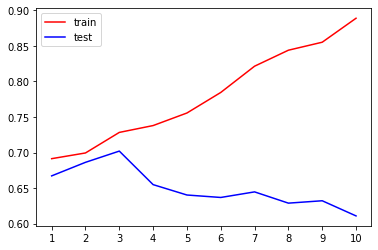

In [27]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 #,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()


### 7. 用网格搜索调整参数


In [30]:
import numpy as np

#网格搜索：帮助我们同时调整多个参数的技术，枚举技术。时间很长！
parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]#带星号就代表这是一个列表
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }
 


clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)
GS.best_params_#返回输入的参数中的最佳组合。

{'criterion': 'entropy',
 'max_depth': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'random'}

In [31]:
 GS.best_score_#返回最佳参数组合下的最佳评判分。

0.7347414234511007